## Hypotheses


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
df = pd.read_csv("../raw_data/all_expanded_ML.csv")

In [3]:
df.head()

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Poverty_%,Unemployed_%,Código_UF,Estado,UF,Município,Região,Acesso_a_internet_%,Adjusted_population,Adjusted_funding
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,...,31.61,6.35,11,Rondônia,RO,Ariquemes,Norte,21,13912.05,5.327668e+06
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,...,31.61,6.35,11,Rondônia,RO,Ariquemes,Norte,21,78834.95,3.019012e+07
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,...,31.61,6.35,11,Rondônia,RO,Cabixi,Norte,21,919.80,2.282065e+05
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,...,31.61,6.35,11,Rondônia,RO,Cabixi,Norte,21,5212.20,1.293170e+06
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,...,31.61,6.35,11,Rondônia,RO,Colorado do Oeste,Norte,21,2713.95,4.222213e+05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62172 entries, 0 to 62171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano                  62172 non-null  int64  
 1   Código_IBGE          62172 non-null  int64  
 2   Localização          62172 non-null  object 
 3   Aprovação            62172 non-null  float64
 4   Reprovação           62172 non-null  float64
 5   Abandono             62172 non-null  float64
 6   Matrículas           62172 non-null  int64  
 7   Docentes             62172 non-null  int64  
 8   Estabelecimentos     62172 non-null  int64  
 9   Turmas               62172 non-null  int64  
 10  Magreza_total_%      62172 non-null  float64
 11  PIB                  62172 non-null  float64
 12  Poverty_%            62172 non-null  float64
 13  Unemployed_%         62172 non-null  float64
 14  Código_UF            62172 non-null  int64  
 15  Estado               62172 non-null 

In [6]:
df[['Matrículas', 'Docentes', 'Aprovação', 'Turmas', 'Abandono']]

,Matrículas,Docentes,Aprovação,Turmas,Abandono
0,498,42,92.6,15,3.4
1,3453,172,69.9,136,13.5
2,38,6,92.1,3,5.3
3,230,22,91.3,11,3.5
4,415,42,90.6,15,0.2
...,...,...,...,...,...
62167,5069,276,93.0,161,1.1
62168,125,12,100.0,6,0.0
62169,496,23,97.2,19,0.2
62170,362,18,99.2,15,0.0


In [25]:
df['Number_students_abandono'] =df['Matrículas'] *  df['Abandono'] // 100

In [31]:

df['Number_students/turma'] =df['Matrículas'] - df['Number_students_abandono'] // df['Turmas']


In [130]:
df['total_students_active'] =df['Matrículas'] - df['Number_students_abandono']

In [132]:
df = df.drop('total_students_ative', axis=1)

In [ ]:
df = df.drop('Number_students', axis=1)

In [38]:
df = df.drop('Number_students/turma', axis=1)

In [39]:
df = df.drop('Number_students_approved', axis=1)

In [65]:
df = df.drop('Number_students/turma', axis=1)

In [66]:
df['Number_students_turma'] = (df['Matrículas'] - df['Number_students_abandono']) / df['Turmas']

In [67]:
df['Number_students_aprovados'] =df['Matrículas'] *  df['Aprovação'] / 100

In [133]:
df.head()

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,UF,Município,Região,Acesso_a_internet_%,Adjusted_population,Adjusted_funding,Number_students_abandono,Number_students_aprovados,Number_students_turma,total_students_active
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,...,RO,Ariquemes,Norte,21,13912.05,5.327668e+06,16.0,461.148,32.133333,482.0
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,...,RO,Ariquemes,Norte,21,78834.95,3.019012e+07,466.0,2413.647,21.963235,2987.0
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,...,RO,Cabixi,Norte,21,919.80,2.282065e+05,2.0,34.998,12.000000,36.0
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,...,RO,Cabixi,Norte,21,5212.20,1.293170e+06,8.0,209.990,20.181818,222.0
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,...,RO,Colorado do Oeste,Norte,21,2713.95,4.222213e+05,0.0,375.990,27.666667,415.0


In [71]:
df[['Number_students_turma',  'Aprovação', 'Localização',]]

,Number_students_turma,Aprovação,Localização
0,32.133333,92.6,Rural
1,21.963235,69.9,Urbana
2,12.000000,92.1,Rural
3,20.181818,91.3,Urbana
4,27.666667,90.6,Rural
...,...,...,...
62167,31.142857,93.0,Urbana
62168,20.833333,100.0,Urbana
62169,26.105263,97.2,Urbana
62170,24.133333,99.2,Urbana


In [102]:
df_sorted = df.sort_values(by='Aprovação', ascending=False)

# Pegue as primeiras 50 linhas do DataFrame classificado
top_50_municipios = df_sorted.head(4000)

# Imprima os 50 municípios com maior taxa de aprovação
for index, row in top_50_municipios.iterrows():
    print(f"Nome: {row['Município']}, Taxa de Aprovação: {row['Aprovação']}, Alunos por turma: {row['Number_students_turma']}")


Nome: Vila Boa, Taxa de Aprovação: 100.0, Alunos por turma: 25.444444444444443
Nome: Canaã dos Carajás, Taxa de Aprovação: 100.0, Alunos por turma: 37.91525423728814
Nome: Itaperuçu, Taxa de Aprovação: 100.0, Alunos por turma: 15.666666666666666
Nome: Guaratuba, Taxa de Aprovação: 100.0, Alunos por turma: 20.333333333333332
Nome: Guaraniaçu, Taxa de Aprovação: 100.0, Alunos por turma: 11.333333333333334
Nome: Francisco Alves, Taxa de Aprovação: 100.0, Alunos por turma: 17.5
Nome: Fernandes Pinheiro, Taxa de Aprovação: 100.0, Alunos por turma: 20.0
Nome: Enéas Marques, Taxa de Aprovação: 100.0, Alunos por turma: 23.333333333333332
Nome: Dois Vizinhos, Taxa de Aprovação: 100.0, Alunos por turma: 20.714285714285715
Nome: Diamante do Sul, Taxa de Aprovação: 100.0, Alunos por turma: 8.0
Nome: Curiúva, Taxa de Aprovação: 100.0, Alunos por turma: 11.0
Nome: Coronel Domingos Soares, Taxa de Aprovação: 100.0, Alunos por turma: 15.444444444444445
Nome: Contenda, Taxa de Aprovação: 100.0, Alunos 

In [78]:
df['Number_students_turma'].describe()

count    62171.000000
mean        51.314853
std        998.118378
min          0.000000
25%         20.750000
50%         25.521739
75%         29.888889
max      50623.000000
Name: Number_students_turma, dtype: float64

In [79]:
df['Number_students_turma'].mode()

0    25.0
Name: Number_students_turma, dtype: float64

In [98]:
df['Number_students_turma'].median()

25.52173913043478

In [99]:
df['Number_students_turma'].mean()

51.31485324962172

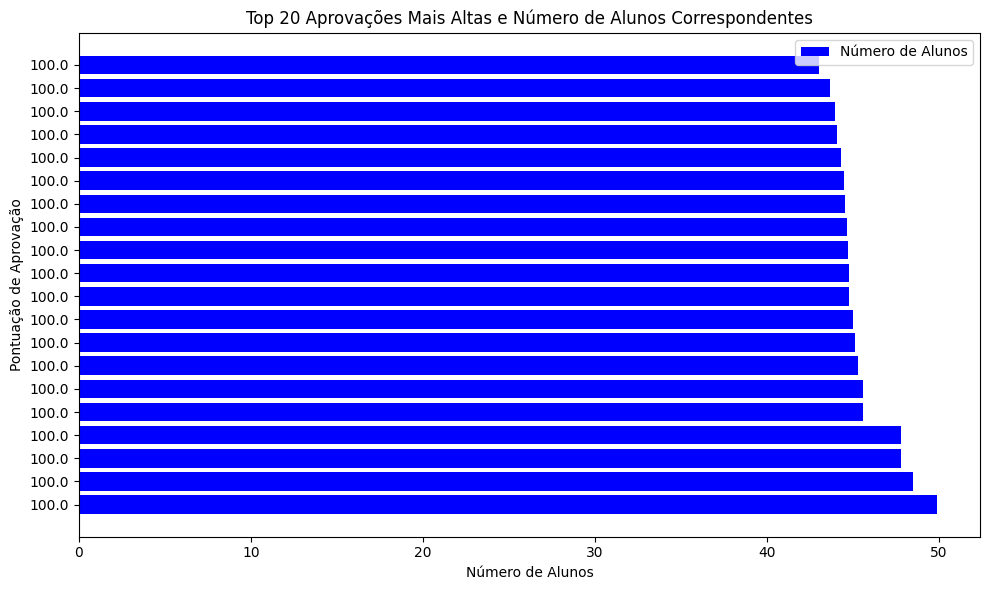

In [97]:
# Ordenando os dados de acordo com as pontuações (do maior para o menor)
sorted_data = sorted(zip(df['Aprovação'], df['Number_students_turma']), reverse=True)

# Separando os dados ordenados novamente em duas listas
sorted_Aprovação, sorted_Number_students_turma = zip(*sorted_data)

# Selecionando apenas os top 100 registros
top_pontuacoes = sorted_Aprovação[:20]
top_num_alunos = sorted_Number_students_turma[:20]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_pontuacoes)), top_num_alunos, color='blue', label='Número de Alunos')
plt.xlabel('Número de Alunos')
plt.ylabel('Pontuação de Aprovação')
plt.title('Top 20 Aprovações Mais Altas e Número de Alunos Correspondentes')
plt.yticks(range(len(top_pontuacoes)), top_pontuacoes)
plt.legend()
plt.tight_layout()

# Mostrando o gráfico
plt.show()


In [120]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [119]:
print(df['Number_students_turma'].isnull().sum())

1


In [123]:
model = smf.ols(formula='Aprovação ~ Number_students_turma', data=df).fit()
print(model.params)
                

Intercept                84.260977
Number_students_turma     0.000051
dtype: float64


In [124]:
model.rsquared

2.3961654221693607e-05

## Linar Regression

In [126]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [134]:
x = df[['total_students_active']]
y = df['Docentes']


In [135]:
model.fit(x,y)

LinearRegression()

In [140]:
model.predict(x)

array([ 55.4488113 , 174.09460877,  34.32464936, ...,  56.11190159,
        49.76518029,  43.46582258])

In [138]:
model.score(x,y)

0.06313187450934188

In [145]:
x1 = df[['total_students_active']]
y1 = df['Adjusted_funding']

In [146]:
model.fit(x1,y1)

LinearRegression()

In [147]:
model.predict(x1)

array([ 6932761.48424547, 28005685.23509241,  3180855.69866553, ...,
        7050534.31159551,  5923280.10695939,  4804438.24713398])

In [148]:
model.score(x1,y1)

0.8693314844374573